# Data Scientist - Code Challenge
We need to predict the demand for the next 24 hours by utilizing past electricity demand data points, humidity, temperature, dew point, and other drivers like weekdays, holidays, and etc.

Inputs: sample data.csv is attached.

Output: A 24-hour demand forecast for a sample day in July or August.

General Requirements The data set may contain outliers and abnormal values. This is everything you need to know about having a better development experience.

Write an instruction to run the project.

Don’t commit the .vscode or .idea directory.

Evaluation: The work will be evaluated based on the accuracy of the electricity demand forecast, the clarity of the code and documentation, and the overall effectiveness of the solution.

The acceptable error rate must be less than 5% (AE < 500 MW, or accuracy more than 95%)

Deliverables for the Code Challenge

Detailed Report: Provide a comprehensive report covering model selection, fine-tuning processes, evaluation metrics, and results.

Code and Documentation: Include all code and documentation necessary to reproduce the experiments and results.

Submission Please submit a GitHub link with your work and fork the repository for collaboration.

You have 1 week to send the challenge!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import joblib

In [ ]:
# Load the dataset
file_path = 'Sample Dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


In [ ]:
df.tail()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
39403,2020-12-31,Thursday,19,36.85,17384,0.2,-4.02,13,-2.69,74,-3.8,100.66
39404,2020-12-31,Thursday,20,19.69,16783,-0.2,-5.59,16,-3.58,65,-6.0,100.76
39405,2020-12-31,Thursday,21,20.78,16154,-3.0,-7.44,12,-3.67,80,-6.0,100.81
39406,2020-12-31,Thursday,22,27.85,15744,-0.8,-6.76,17,-4.11,70,-5.6,100.90
39407,2020-12-31,Thursday,23,19.68,15092,-2.1,-6.21,11,-4.72,73,-6.2,100.90


In [ ]:
df.shape

(39408, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39408 entries, 0 to 39407
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               39408 non-null  object 
 1   Weekday            39408 non-null  object 
 2   Hour               39408 non-null  int64  
 3   HOEP               39408 non-null  float64
 4   Ontario_Demand     39408 non-null  int64  
 5   Temperature        39408 non-null  float64
 6   Windchill_Index    39408 non-null  float64
 7   Wind_Speed         39408 non-null  int64  
 8   Humidex            39408 non-null  float64
 9   Relative_Humidity  39408 non-null  int64  
 10  Dew_Point          39408 non-null  float64
 11  Pressure_Station   39408 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
count,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000
mean,11.625076,13.923340,15397.914205,9.421272,6.565978,16.854243,9.859521,68.028598,3.330397,99.533605
std,6.945136,11.902378,2201.241563,10.899602,13.513148,9.220125,14.325742,16.773789,10.269080,0.776696
min,0.000000,-2.770000,9831.000000,-26.000000,-39.660000,0.000000,-31.100000,13.000000,-31.600000,96.490000
25%,6.000000,3.300000,13775.000000,0.800000,-3.950000,10.000000,-1.680000,57.000000,-4.400000,99.050000
50%,12.000000,12.950000,15272.000000,8.600000,5.670000,16.000000,7.860000,69.000000,3.000000,99.540000
75%,18.000000,22.510000,16881.000000,19.000000,18.580000,22.000000,22.350000,81.000000,12.100000,100.040000
max,23.000000,44.110000,24281.000000,35.100000,37.940000,80.000000,50.350000,100.000000,25.100000,102.410000


In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extract time-based features
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

In [ ]:
# Drop the original 'Date' column
df.drop(columns=['Date'], inplace=True)

In [ ]:
# Feature scaling for relevant columns
scaler = StandardScaler()
scaled_features = ['Temperature', 'Windchill_Index', 'Wind_Speed', 'Humidex', 'Relative_Humidity', 'Dew_Point', 'Pressure_Station']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [ ]:
# Create lag features for past demand
for lag in range(1, 25):
    df[f'Ontario_Demand_lag_{lag}'] = df['Ontario_Demand'].shift(lag)

In [ ]:
# Drop rows with NaN values created by lagging
df.dropna(inplace=True)

In [ ]:
# Define features and target variable
features = [col for col in df.columns if col not in ['Ontario_Demand']]
target = 'Ontario_Demand'

In [ ]:
# Split the data
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 223.6457242605053


In [ ]:
# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 1.53%


In [ ]:
accuracy = 100 - mape
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 98.47%


In [ ]:
# Calculate the percentage of predictions within 500 MW error
within_500_mw = np.mean(np.abs(y_test - y_pred) <= 500) * 100
print(f'Percentage of predictions within 500 MW error: {within_500_mw:.2f}%')

Percentage of predictions within 500 MW error: 91.63%


In [ ]:
# Save the model
joblib.dump(model, 'electricity_demand_model.pkl')

['electricity_demand_model.pkl']

In [ ]:
# Load the model for prediction
model = joblib.load('electricity_demand_model.pkl')

In [ ]:
# Specify the target date (e.g., July 15th)
target_date = '2023-07-15'
date_df = pd.date_range(start=target_date, periods=24, freq='H').to_frame(index=False, name='Date')

In [ ]:
# Add time-based features for the target date
date_df['Hour'] = date_df['Date'].dt.hour
date_df['Day'] = date_df['Date'].dt.day
date_df['Month'] = date_df['Date'].dt.month
date_df['Weekday'] = date_df['Date'].dt.weekday


In [ ]:
# Calculate the mean values of the weather-related columns for the target date
mean_values = df[scaled_features].mean()
mean_hoep = df['HOEP'].mean()

In [ ]:
# Add mean values of weather-related columns to date_df
for feature in scaled_features:
    date_df[feature] = mean_values[feature]

In [ ]:
# Add the HOEP column with the mean value
date_df['HOEP'] = mean_hoep

In [ ]:

# Add placeholder columns for lag features
for lag in range(1, 25):
    date_df[f'Ontario_Demand_lag_{lag}'] = np.nan

In [ ]:
# Use the most recent known demand values to fill in the lag features
latest_demand_values = df['Ontario_Demand'].tail(24).values
for i in range(24):
    for lag in range(1, 25):
        if i - lag >= 0:
            date_df.at[i, f'Ontario_Demand_lag_{lag}'] = latest_demand_values[i - lag]
        else:
            date_df.at[i, f'Ontario_Demand_lag_{lag}'] = latest_demand_values[lag - i - 1]


In [ ]:
# Scale the features
date_df[scaled_features] = scaler.transform(date_df[scaled_features])

In [ ]:
# Drop the 'Date' column before prediction
date_df.drop(columns=['Date'], inplace=True)

In [ ]:

# Predict for the target date
predictions = model.predict(date_df[features])

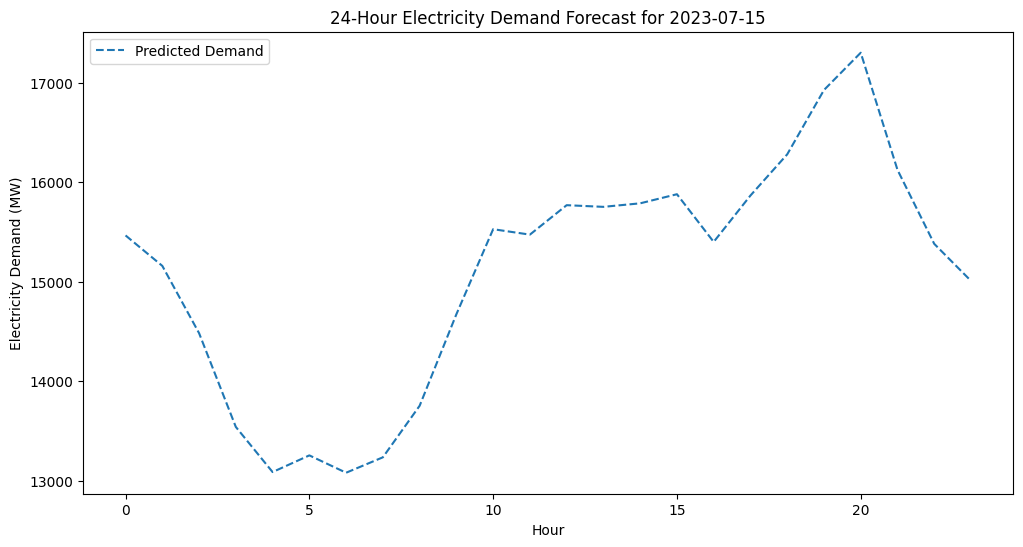

In [ ]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted Demand', linestyle='--')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Electricity Demand (MW)')
plt.title(f'24-Hour Electricity Demand Forecast for {target_date}')
plt.show()

In [ ]:
# Print the predictions
print(f'24-Hour Electricity Demand Forecast for {target_date}:')
print(predictions)

24-Hour Electricity Demand Forecast for 2023-07-15:
[15463.93 15157.84 14481.67 13538.99 13085.51 13253.03 13078.76 13233.62
 13751.62 14671.73 15526.56 15472.03 15768.   15751.25 15786.63 15878.15
 15398.95 15865.1  16278.99 16925.55 17300.48 16122.95 15379.24 15007.01]


# Problem Statement:
We need to predict the demand for the next 24 hours by utilizing past electricity demand data points, humidity, temperature, dew point, and other drivers like weekdays, holidays, and etc.

Inputs: sample data.csv is attached.

Output: A 24-hour demand forecast for a sample day in July or August.

General Requirements The data set may contain outliers and abnormal values. This is everything you need to know about having a better development experience.


# Solutions:
 Step1: Import all the requirement libraries and load the data.

Step2: preprocessing of the data and convert the data according to the required format.

Step3: split the data into the train and test.

Step4:
Model selection:

 I use the Random forests model it is a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance.Selecting the optimized language model careful evaluation of multiple criteria and the trade-offs amongst them. As you consider options, take into account details of your specific use case, domain data, customization requirements, context size etc.

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

Step5:
Evaluation metric :
(1) Mean Absolute Error:It is the absolute sum of total errors values obtained from the difference of estimated and measured values divide by number of observations.

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

result:Mean Absolute Error: 223.6457242605053

(2)mean absolute percentag error: it is a relative error measure that uses absolute values to keep the positive and negative errors from canceling one another out.

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

result:Mean Absolute Percentage Error: 1.53%

step6:
final Result:

Accuracy:is a metric that measures how often a machine learning model correctly predicts the outcome.
accuracy = 100 - mape
print(f'Accuracy: {accuracy:.2f}%')
Accuracy: 98.47%

